In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


In [2]:
data = pd.read_csv('Data-Melbourne_F_fixed.csv')

In [3]:
data

,Serial No.,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56,0.00,10.0,14.4,22.2,2019,6,20
1378,1378,5.882,5.510,293446,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71,0.00,0.0,13.5,25.9,2019,6,24
1379,1379,4.638,4.811,307968,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65,0.00,10.0,18.1,25.9,2019,6,25
1380,1380,5.373,4.929,316675,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65,0.00,10.0,21.9,35.2,2019,6,26


In [4]:
# Drop the first column by its index
data = data.drop(data.columns[0], axis=1)

In [5]:
data.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7


## Feature Engineering: Create a new target variable 'Operational_Status' 

In [6]:

def create_operational_status(data):
    optimal_conditions = (
        (data['Ammonia'] < 30) & 
        (data['Biological Oxygen Demand'] < 400) & 
        (data['Chemical Oxygen Demand'] < 800) & 
        (data['Total Nitrogen'] < 70)
    )
    data['Operational_Status'] = np.where(optimal_conditions, 1, 0)

create_operational_status(data)

## EDA

In [8]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
Operational_Status          0
dtype: int64


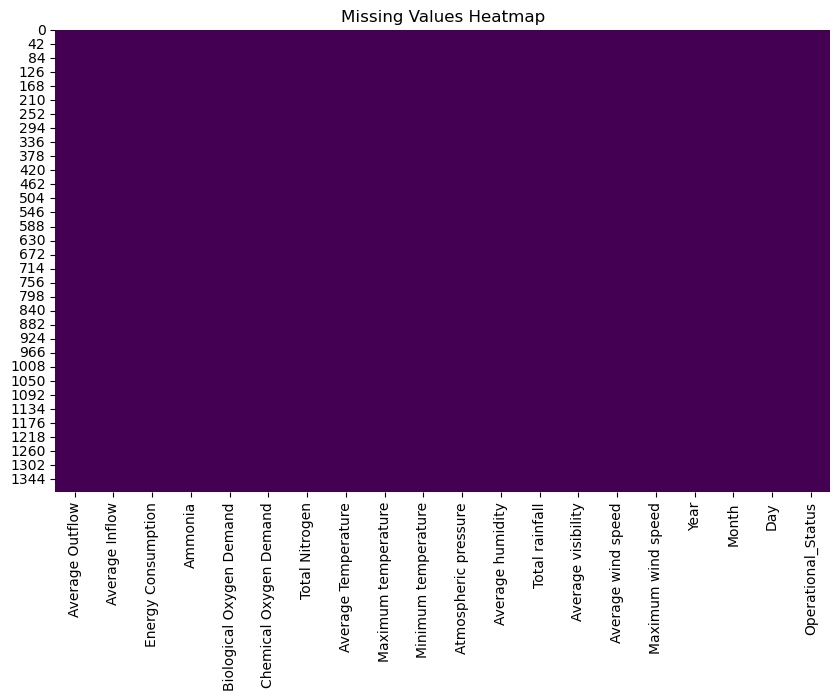

In [9]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
# Descriptive statistics
data.describe()


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Operational_Status
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660,0.065847
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422,0.248104
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000,0.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000,0.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000,0.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000,1.000000


In [12]:
# Check for skewness in numerical features
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    skewness = data[column].skew()
    print(f"Skewness of {column}: {skewness:.2f}")

Skewness of Average Outflow: 0.38
Skewness of Average Inflow: 3.75
Skewness of Energy Consumption: -0.15
Skewness of Ammonia: 0.31
Skewness of Biological Oxygen Demand: 1.23
Skewness of Chemical Oxygen Demand: 0.74
Skewness of Total Nitrogen: -0.26
Skewness of Average Temperature: 0.55
Skewness of Maximum temperature: 0.49
Skewness of Minimum temperature: 0.50
Skewness of Atmospheric pressure: 16.55
Skewness of Average humidity: -0.81
Skewness of Total rainfall: 8.76
Skewness of Average visibility: 22.20
Skewness of Average wind speed: 0.83
Skewness of Maximum wind speed: 0.55
Skewness of Year: 0.10
Skewness of Month: 0.13
Skewness of Day: 0.04


In [14]:
from scipy import stats
# Function to apply transformations based on skewness
def correct_skewness(df):
    for column in df.columns:
        skewness = df[column].skew()
        if skewness > 1:  # Highly right-skewed
            df[column] = np.log1p(df[column])  # Log transformation
        elif skewness < -1:  # Highly left-skewed
            df[column] = np.expm1(df[column])  # Exponential transformation
        elif skewness > 0:  # Moderately right-skewed
            df[column] = np.sqrt(df[column])  # Square root transformation
        elif skewness < 0:  # Moderately left-skewed
            df[column] = np.cbrt(df[column])  # Cube root transformation

# Apply skewness correction to the existing DataFrame 'data'
correct_skewness(data)

# Display corrected data and their new skewness values
print("Corrected Data:")
data

Corrected Data:


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Operational_Status
0,4.556311,0.823242,3.826443,1.732051,2.429534,5.197933,1.577159,1.637795,1.711114,1.525440,0.0,44.872342,0.654541,10.0,1.730980,1.941149,6.699075,1.000000,1.000000,0.526589
1,4.548214,0.865627,3.840189,1.709976,2.432324,5.215644,1.576134,1.605090,1.693631,1.519326,0.0,52.466603,0.000000,10.0,1.559769,1.740500,6.699075,1.000000,1.122462,0.526589
2,4.535268,0.892416,3.885861,1.864411,2.457208,5.377143,1.588834,1.600362,1.734183,1.436858,0.0,35.922683,0.201424,10.0,1.780868,1.984603,6.699075,1.000000,1.307660,0.000000
3,4.535268,0.904661,3.897541,1.817121,2.462947,5.399515,1.584626,1.563359,1.646173,1.493553,0.0,37.834371,0.000000,10.0,1.732051,1.840736,6.699075,1.000000,1.348006,0.000000
4,4.517488,0.942880,3.887585,1.892894,2.496487,5.645773,1.591735,1.541171,1.634954,1.414214,0.0,54.741546,0.000000,10.0,1.655686,1.810327,6.699075,1.000000,1.383088,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,8.499336,1.009150,4.069254,1.742581,2.395786,5.068576,1.572546,1.376422,1.467799,1.259921,0.0,44.872342,0.000000,10.0,1.559769,1.676456,6.703229,1.348006,1.647549,0.526589
1378,10.305434,1.055475,4.050449,1.849311,2.350628,5.143687,1.578007,1.402175,1.587401,1.200937,0.0,61.854199,0.000000,0.0,1.543082,1.720085,6.703229,1.348006,1.698381,0.000000
1379,7.615834,1.015141,4.072246,1.899691,2.358924,5.415326,1.587401,1.460367,1.587401,1.200937,0.0,54.741546,0.000000,10.0,1.620366,1.720085,6.703229,1.348006,1.709976,0.000000
1380,9.155072,1.022399,4.084880,1.892894,2.388956,5.477226,1.583164,1.489033,1.603522,1.307660,0.0,54.741546,0.000000,10.0,1.672659,1.810327,6.703229,1.348006,1.721190,0.000000


In [15]:
print("\nNew Skewness Values:")
data.skew()


New Skewness Values:


Average Outflow              1.038096
Average Inflow               1.453630
Energy Consumption          -0.603504
Ammonia                     -0.505712
Biological Oxygen Demand     0.155079
Chemical Oxygen Demand      -0.005392
Total Nitrogen              -1.069794
Average Temperature         -5.906358
Maximum temperature         -6.798724
Minimum temperature         -4.139890
Atmospheric pressure        16.552895
Average humidity            -0.293041
Total rainfall               4.565758
Average visibility          22.195410
Average wind speed          -5.885192
Maximum wind speed          -6.787394
Year                         0.097077
Month                       -0.657872
Day                         -0.924319
Operational_Status           3.504848
dtype: float64

In [20]:
# Function to plot histograms before and after transformation
def plot_distributions(original_df, transformed_df):
    num_columns = original_df.shape[1]
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(12, 4 * num_columns))

    for i, column in enumerate(original_df.columns):
        # Plot original data
        axes[i, 0].hist(original_df[column], bins=30, color='blue', alpha=0.7)
        axes[i, 0].set_title(f'Original Distribution of {column}')
        axes[i, 0].set_xlabel('Value')
        axes[i, 0].set_ylabel('Frequency')

        # Plot transformed data
        axes[i, 1].hist(transformed_df[column], bins=30, color='green', alpha=0.7)
        axes[i, 1].set_title(f'Transformed Distribution of {column}')
        axes[i, 1].set_xlabel('Value')
        axes[i, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

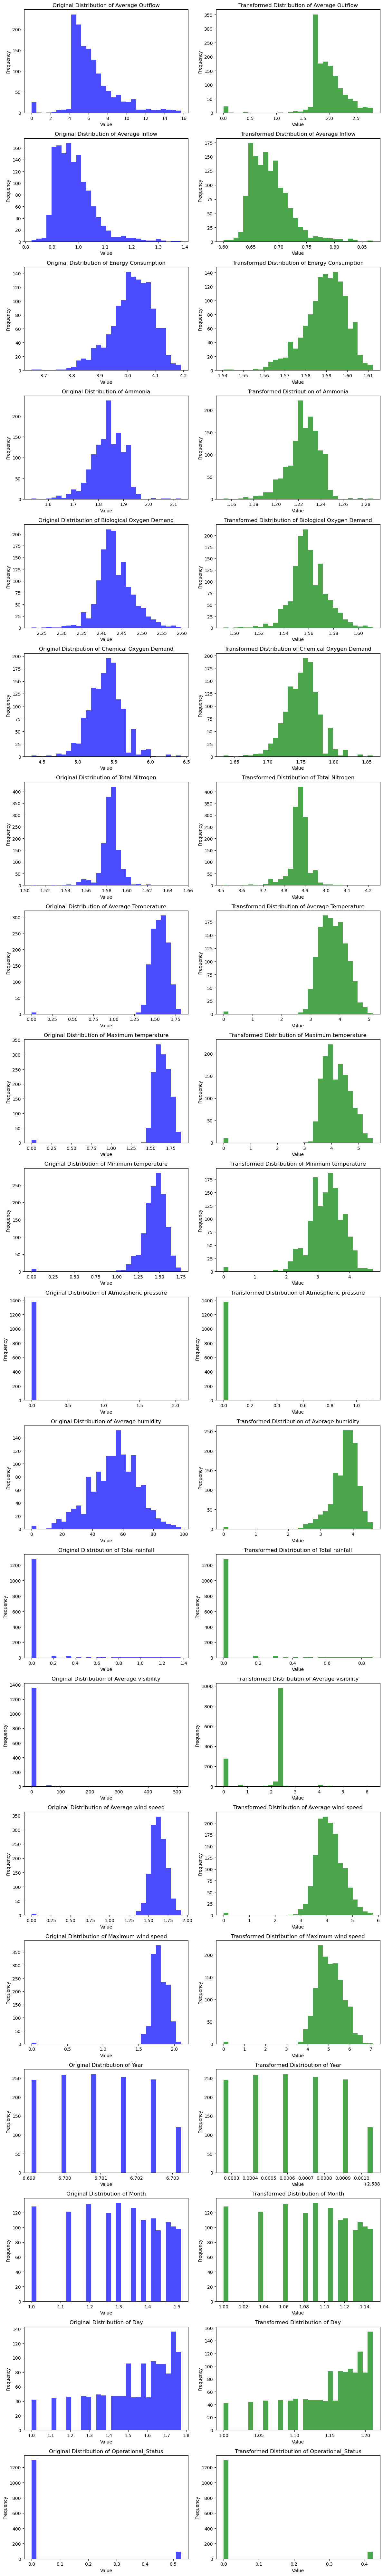

In [21]:
 # Store original data for comparison
original_data = data.copy()

# Apply skewness correction to the existing DataFrame 'data'
correct_skewness(data)

# Call the function to plot distributions
plot_distributions(original_data, data)  # Pass original data and transformed data

## Feature Engineering: Create derived features

In [22]:
#  Inflow/Outflow Ratio
if 'Average Inflow' in data.columns and 'Average Outflow' in data.columns:
    data['Inflow_Outflow_Ratio'] = data['Average Inflow'] / (data['Average Outflow'] + 1e-5)

#  Temperature Range
if 'Maximum temperature' in data.columns and 'Minimum temperature' in data.columns:
    data['Temperature Range'] = data['Maximum temperature'] - data['Minimum temperature']

#  Humidity/Temperature Interaction
if 'Average humidity' in data.columns and 'Average Temperature' in data.columns:
    data['Humidity_Temperature_Interaction'] = data['Average humidity'] * data['Average Temperature']

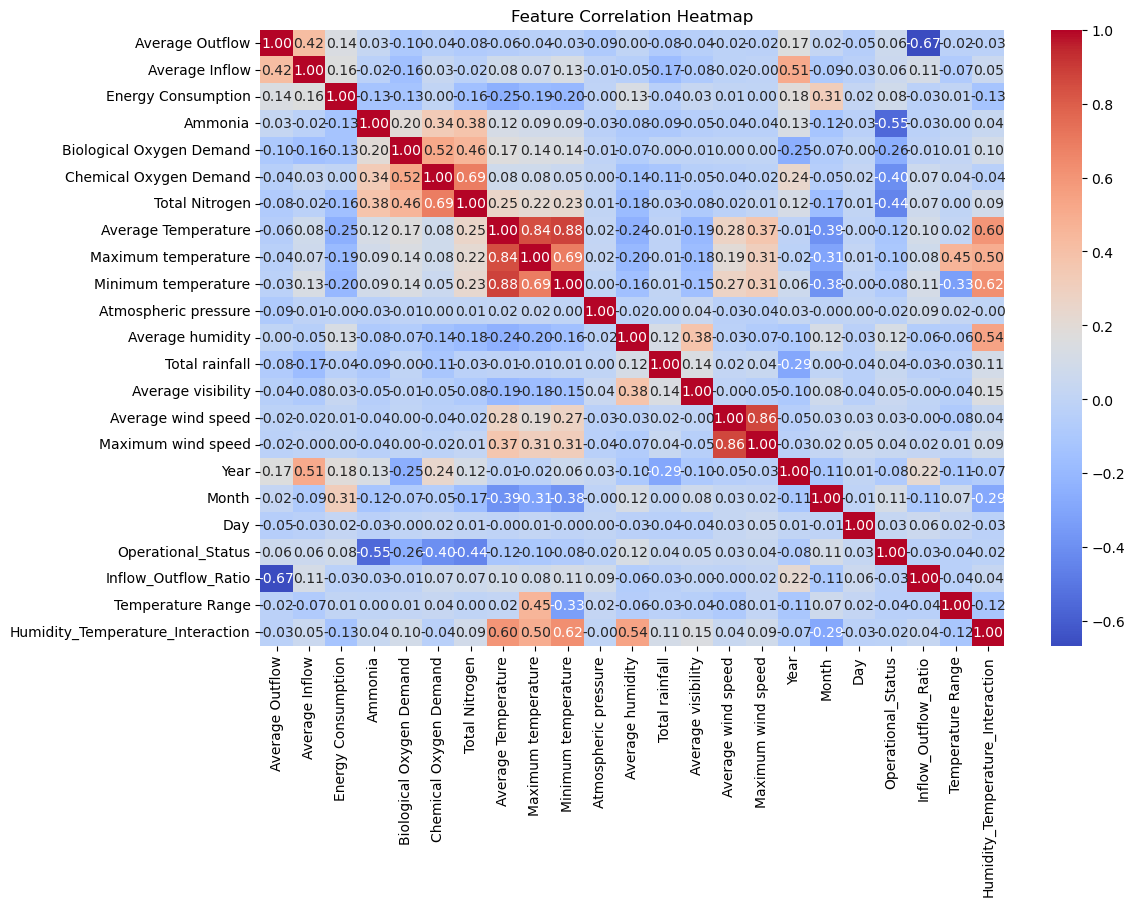

In [23]:
# Check correlations after creating new features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
# Define features and target
X = data.drop(columns=['Operational_Status'])  # Drop target column
y = data['Operational_Status']

In [27]:
y.unique()

array([0.42303586, 0.        ])

In [29]:
# Example: Convert continuous values into binary classes
y = np.where(y > 0.5, 1, 0)  # Replace 'threshold' with your desired cutoff


In [30]:
# Example: Define bins for multiclass classification
bins = [0, 10, 20, 30]  # Define the range for each bin
labels = [0, 1, 2]      # Define class labels
y = pd.cut(y, bins=bins, labels=labels)


In [32]:
# Handle NaN values in the target variable
y = y.fillna(0)  # Replace NaN with a default value (e.g., 0)

# Convert to integer
y = y.astype(int)


## SMOTE 

In [43]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame with potential NaN values

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')  # Choose appropriate strategy
data_imputed = imputer.fit_transform(data)

# Convert the imputed data back to DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

# Step 2: Convert continuous target variable to categorical
# Assuming the last column is the target variable
threshold = data_imputed.iloc[:, -1].median()  # You can choose a different threshold
data_imputed.iloc[:, -1] = (data_imputed.iloc[:, -1] > threshold).astype(int)  # Binary classification

# Step 3: Apply SMOTE
X = data_imputed.iloc[:, :-1]  # All columns except the last one as features
y = data_imputed.iloc[:, -1]    # Last column as target variable

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now X_resampled and y_resampled can be used for training your model


In [44]:
from collections import Counter
# Verify new class distribution
print("Class Distribution After SMOTE:", Counter(y_resampled))

Class Distribution After SMOTE: Counter({1: 691, 0: 691})


## Feature Selection using Recursive Feature Elimination (RFE)

In [45]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')
rfe.fit(X_resampled, y_resampled)

RFECV(cv=5, estimator=LogisticRegression(max_iter=1000), scoring='accuracy')

In [46]:
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features.tolist())

Selected Features: ['Average Temperature', 'Average humidity']


## Split the data into training and testing sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [48]:
# Train and evaluate multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
}

In [49]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"F1 Score: {f1_score(y_test, preds, average='binary'):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds)}")
    print(f"Classification Report:\n{classification_report(y_test, preds)}")


Model: Logistic Regression
Accuracy: 0.91
F1 Score: 0.91
Confusion Matrix:
[[118   9]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       127
           1       0.94      0.89      0.91       150

    accuracy                           0.91       277
   macro avg       0.91      0.91      0.91       277
weighted avg       0.91      0.91      0.91       277


Model: KNN
Accuracy: 0.86
F1 Score: 0.87
Confusion Matrix:
[[112  15]
 [ 24 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       127
           1       0.89      0.84      0.87       150

    accuracy                           0.86       277
   macro avg       0.86      0.86      0.86       277
weighted avg       0.86      0.86      0.86       277


Model: Decision Tree
Accuracy: 0.89
F1 Score: 0.90
Confusion Matrix:
[[110  17]
 [ 13 137]]
Classification Report:
  

In [50]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [51]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [52]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}


In [53]:
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [54]:
svc = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)


In [56]:
# Train and evaluate multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "Random Forest": RandomForestClassifier(n_estimators=100,min_samples_split=5, max_depth=None, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)

}

In [57]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"F1 Score: {f1_score(y_test, preds, average='binary'):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds)}")
    print(f"Classification Report:\n{classification_report(y_test, preds)}")


Model: Logistic Regression
Accuracy: 0.91
F1 Score: 0.91
Confusion Matrix:
[[118   9]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       127
           1       0.94      0.89      0.91       150

    accuracy                           0.91       277
   macro avg       0.91      0.91      0.91       277
weighted avg       0.91      0.91      0.91       277


Model: KNN
Accuracy: 0.86
F1 Score: 0.87
Confusion Matrix:
[[112  15]
 [ 24 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       127
           1       0.89      0.84      0.87       150

    accuracy                           0.86       277
   macro avg       0.86      0.86      0.86       277
weighted avg       0.86      0.86      0.86       277


Model: Decision Tree
Accuracy: 0.89
F1 Score: 0.90
Confusion Matrix:
[[109  18]
 [ 13 137]]
Classification Report:
  